# Módulo 01

## 1.1

In [ ]:
import pandas as pd
# Dados obtidos no https://datasus.saude.gov.br/informacoes-de-saude-tabnet/
# Assistência à Saude > Produção Hospitalar (SIH/SUS) > Dados Consolidados AIH (RD), por local de internação, a partir de 2008

dados = pd.read_csv("https://raw.githubusercontent.com/ctulio/agendamento-hospitalar/main/A224250189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";",
                    thousands=".", decimal="," )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [ ]:
pd.options.display.float_format="{:.2f}".format
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

Text(0.5, 1.0, 'Valores consolidados dos procedimentos hospitalares do SUS por UF')

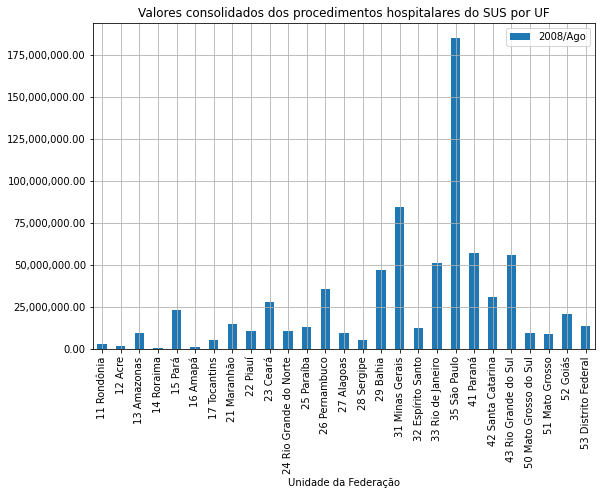

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valores consolidados dos procedimentos hospitalares do SUS por UF")

In [ ]:
dados["Unidade da Federação"]

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

## Desafio: escolher um título mais descritivo

In [ ]:
# "Valores consolidados dos procedimentos hospitalares do SUS por UF"

## Fazer a mesma análise para ao mês mais recente

Text(0.5, 1.0, 'Valores gastos em procedimentos hospitalares do SUS por UF')

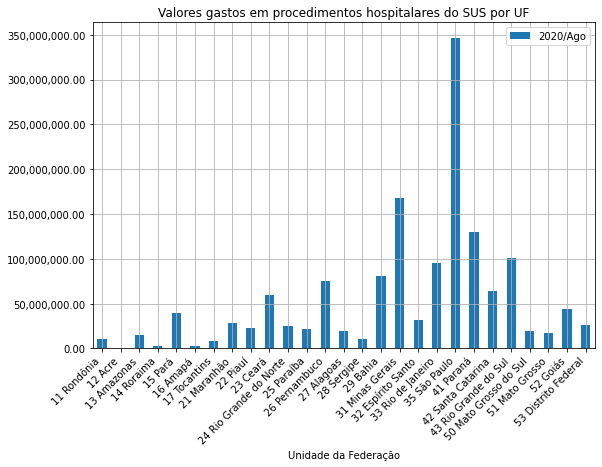

In [ ]:
# A série 2020/Ago é definida com object, portanto, é necessário remover dados não-numéricos e converter para float.
dados["2020/Ago"] = dados["2020/Ago"].replace("-",0)
dados["2020/Ago"] = dados["2020/Ago"].astype(float)

ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(9,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Valores gastos em procedimentos hospitalares do SUS por UF")

## 1.2

In [ ]:
import pandas as pd
# Dados obtidos no https://datasus.saude.gov.br/informacoes-de-saude-tabnet/
# Assistência à Saude > Produção Hospitalar (SIH/SUS) > Dados Consolidados AIH (RD), por local de internação, a partir de 2008
#Filtros: "UF"/"Ano/mês processamento"/"Valor total"/"2008-2020"
dados = pd.read_csv("https://raw.githubusercontent.com/ctulio/agendamento-hospitalar/main/A160324189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";",
                    thousands=".", decimal="," )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [ ]:
dados.head(2)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63


In [ ]:
dados[["2008/Ago", "2008/Set"]].head()


,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [ ]:
# Para explorar um ano/mês que possua registro de todos os estados pode-se usar uma dedução a partir da média
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [ ]:
# O ano/mês mais antigo do dataset é 1992/Março, no entanto, o ano/mês mais antigo retornado pela função .mean() é 2007/Agosto.
# Isso acontece porque ano/mês que possuem campos vazios são ignorados e a média não é calculada para o ano/mês em questão.
# As colunas ano/mês que possuem a média calculada possuem todos os campos preenchidos

In [ ]:
# Foi excluída a coluna com o nome dos estados no processo anterior, por isso é necessário reinserir
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
print(f'{usaveis.shape[0]} linhas e {usaveis.shape[1]} colunas')
print(usaveis.head(3))

27 linhas e 158 colunas
  Unidade da Federação  2007/Ago  ...    2020/Jul         Total
0          11 Rondônia   4209.37  ...  7407388.24  929129659.72
1              12 Acre  10470.07  ...  1163813.08  420668039.63
2          13 Amazonas  35752.72  ... 13358514.02 1771654871.23

[3 rows x 158 columns]


In [ ]:
# list
colunas_usaveis[:4]

['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out']

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
print(usaveis.shape)
print(usaveis.head())

(27, 157)
                      2007/Ago  2007/Set  ...    2020/Jul         Total
Unidade da Federação                      ...                          
11 Rondônia            4209.37  16397.03  ...  7407388.24  929129659.72
12 Acre               10470.07  14001.71  ...  1163813.08  420668039.63
13 Amazonas           35752.72  45570.64  ... 13358514.02 1771654871.23
14 Roraima             4785.91  11858.63  ...  2739498.41  305010883.18
15 Pará              181159.29 433414.74  ... 27618727.51 4437115730.71

[5 rows x 157 columns]


In [ ]:
# Retornar a coluna
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [ ]:
# retonar a linha que tem como índice "11 Rondônia"
usaveis.loc["11 Rondônia"]

2007/Ago        4209.37
2007/Set       16397.03
2007/Out      133645.19
2007/Nov      346912.84
2007/Dez      711758.31
               ...     
2020/Abr     7423678.64
2020/Mai     8581195.13
2020/Jun     9193593.76
2020/Jul     7407388.24
Total      929129659.72
Name: 11 Rondônia, Length: 157, dtype: float64

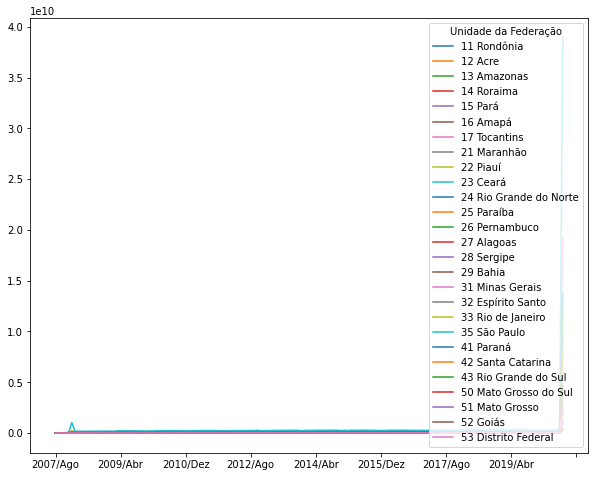

In [ ]:
# o dataset usaveis possui a coluna Total para distorcer valores e gráficos

usaveis.T.plot(figsize=(10,8))

In [ ]:
# Observando a coluna Total que está transposta em linha
# Essa coluna distorce o gráfico.
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,126330649.86,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,136867275.75,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,20219961.81,19666096.87,68145110.59,14278872.07,6705923.03,65159300.63,135977571.87,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,19593057.45,15491469.06,62325444.34,13087850.40,3312766.32,58898100.40,120467187.34,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,2477372149.60,2470550104.25,8046954289.39,2104405303.11,1130337049.71,9193802684.16,19160106499.88,3139189177.73,9696362872.68,38929353900.57,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657348958.66,2429933198.76


In [ ]:
# O eixo 0 (linha) é onde ocorre a busca padrão, pra dropar a coluna "Total" é necessário informar o eixo 1
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

In [ ]:
usaveis.loc["35 São Paulo"]

2007/Ago     1665349.90
2007/Set     4434168.64
2007/Out    14577395.84
2007/Nov    35032259.98
2007/Dez    76668547.41
               ...     
2020/Mar   276606288.92
2020/Abr   251696362.66
2020/Mai   302857660.98
2020/Jun   299060851.62
2020/Jul   282709570.31
Name: 35 São Paulo, Length: 156, dtype: float64

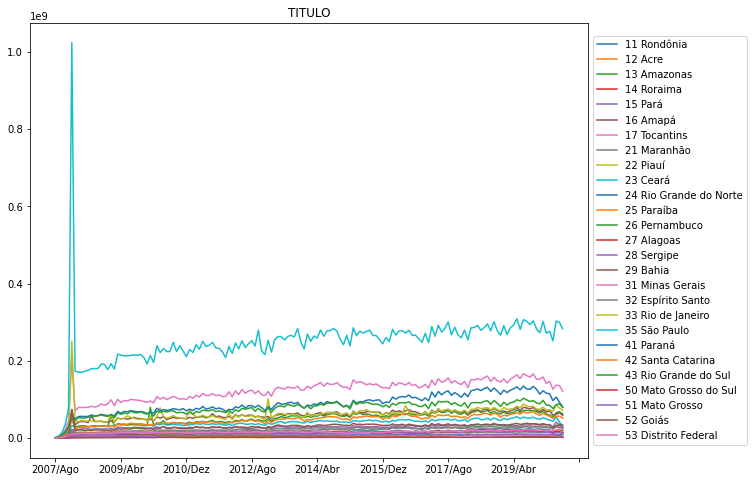

In [ ]:
usaveis.T.plot(figsize=(10,8))
plt.title("TITULO")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


### Reposicionar a legenda

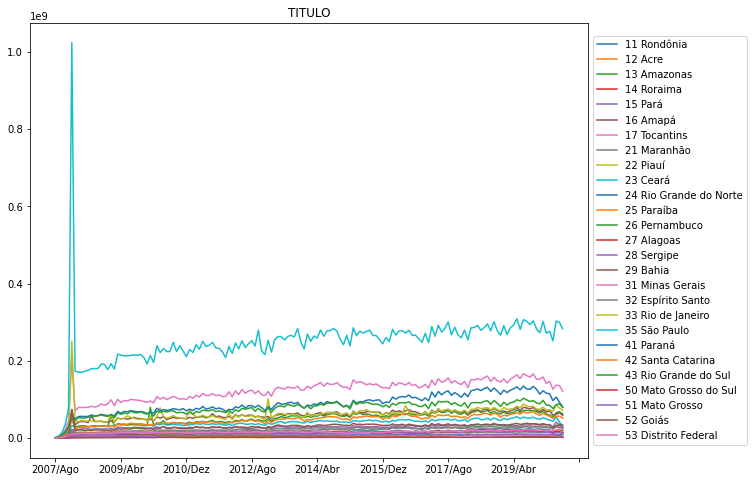

In [ ]:
usaveis.T.plot(figsize=(10,8))
plt.title("TITULO")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Efetuar a plotagem com 5 estados

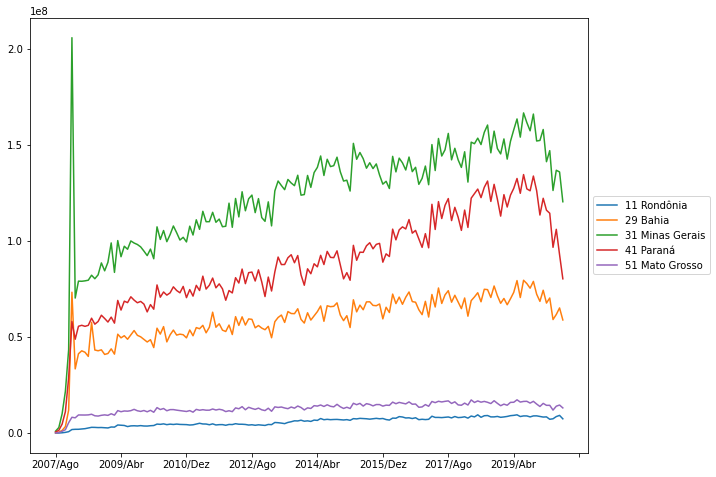

In [ ]:
# Minha abordagem
os5 = usaveis.loc[["11 Rondônia", "29 Bahia", "31 Minas Gerais", "41 Paraná", "51 Mato Grosso"]]
os5.T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Outros métodos para definir slices
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

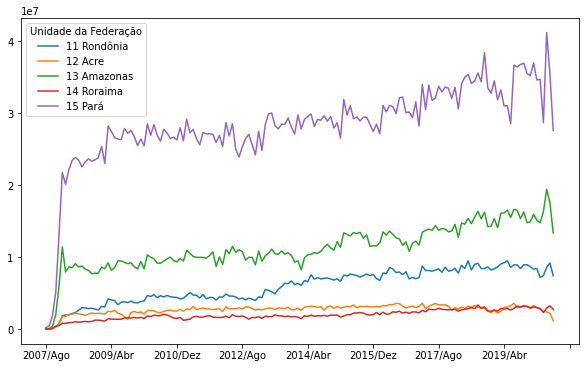

In [ ]:
usaveis.T.columns[:5]
usaveis[:5].T.plot(figsize=(10,6))

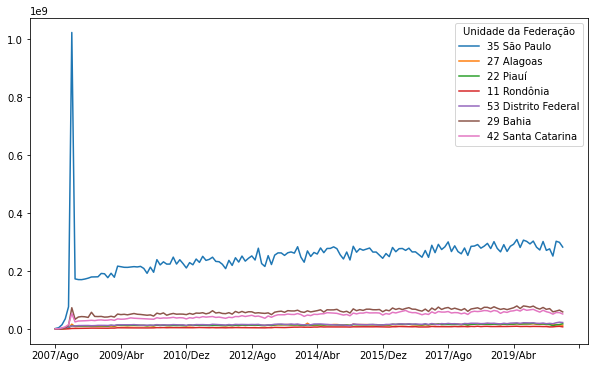

In [ ]:
# Definir amostras aleatórias 
import numpy as np

np.random.seed(1987)

os7 = usaveis.sample(n=7)
os7.T.plot(figsize=(10,6))

### Mudar a palete de cores usando matplotlib

In [ ]:
# Criação manual do palete de cores
#color = ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF',
        #  '#AE0DDE', '#3B7D54', '#1540F5', '#5B8D51', '#966E83', '#603F43', '#EE4961', '#642C80', '#AD95C6', '#30D4F7',
        #  '#D83598', '#390C52', '#3AACCE', '#4EAABC', '#24C7AA', '#2C82F4', '#62AD3A']
#len(color) #o comando len traz o comprimento total

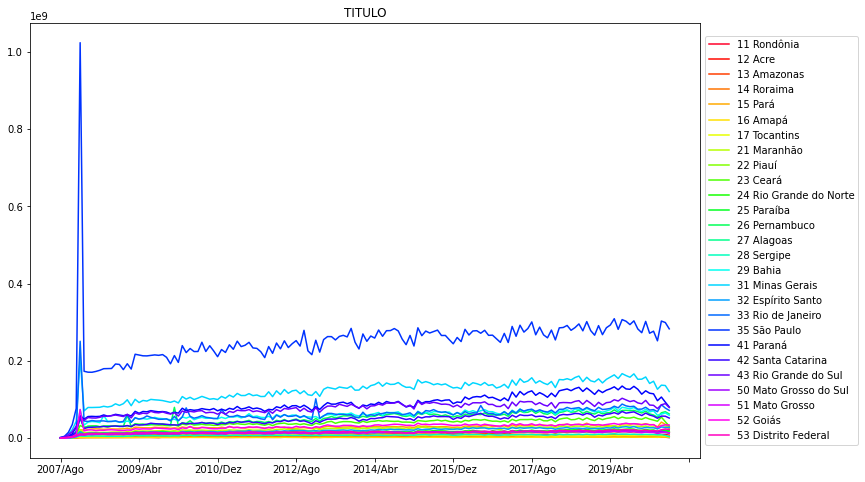

In [ ]:
import numpy as np
from matplotlib import cm

color = cm.gist_rainbow(np.linspace(.0, 1, 27)) # Cria uma lista de cores baseada na paleta gist_rainbow do matplotlib usando numpy
ax = usaveis.T.plot(figsize=(12,8), color=color)


plt.title("TITULO")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.07), ncol=4) # Coloca a legenda embaixo
#PENDENTE

In [ ]:
# Adicionando a coluna total
usaveis["Total"] = usaveis.sum(axis=1)


### Criar uma coluna mostrando a região dos estados

In [ ]:
regiao = [] 
num_estados = len(usaveis.index)
for i in range(num_estados):
  if usaveis.index[i].startswith("1"):
    regiao.append("Norte")
  if usaveis.index[i].startswith("2"):
    regiao.append("Nordeste")
  if usaveis.index[i].startswith("3"):
    regiao.append("Sudeste")
  if usaveis.index[i].startswith("4"):
    regiao.append("Sul")
  if usaveis.index[i].startswith("5"):
    regiao.append("Centro-Oeste")

regiao

usaveis["Região"] = regiao
#usaveis["Região"]

""" Solução simples inteligível
#criando uma coluna com a primeira posição da string do Índice
usaveis['Região'] = usaveis.index.str[0]
#Criando um dicionário para efetuar a substituição do número por um nome
regioes = {
    '1': 'Norte',
    '2': 'Nordeste',
    '3': 'Sudeste',
    '4': 'Sul',
    '5': 'Centro-Oeste'
}
#alterando os dados da coluna criada para que constem os nomes das regiões e não um número
usaveis['Região'] = usaveis['Região'].replace(regioes)
"""

"""
cod_regiao = dados.index
num_regiao = cod_regiao.str.slice(start=0,stop=1)

num_regiao = usaveis.index.str[0]
mapa = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
coluna_regiao = num_regiao.map(mapa)
dados['Região'] = coluna_regiao
"""
num_regiao = usaveis.index.str[0]
num_regiao

Index(['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '4', '4', '4', '5', '5', '5', '5'],
      dtype='object', name='Unidade da Federação')

In [ ]:
usaveis.loc["11 Rondônia"]

2007/Ago        4209.37
2007/Set       16397.03
2007/Out      133645.19
2007/Nov      346912.84
2007/Dez      711758.31
               ...     
2020/Mai     8581195.13
2020/Jun     9193593.76
2020/Jul     7407388.24
Total      925572673.82
Região            Norte
Name: 11 Rondônia, Length: 158, dtype: object

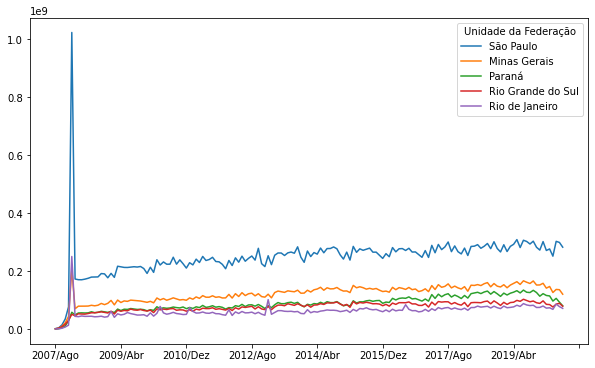

In [ ]:
# 
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total.index = ordenado_por_total.index.str[3:] # Remover os números iniciais e o espaço


# Removido a coluna total (pois o dataset já está ordenado pelo total e não é desejável plotar o total
# e removida a coluna Região pois não contém dados númericos )
ordenado_por_total = ordenado_por_total.drop(columns=["Total", "Região"])
ordenado_por_total.head(5).T.plot(figsize=(10,6))

In [ ]:
usaveis["Região"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

### Deixar o gráfico mais agradável (Título, legenda escala)

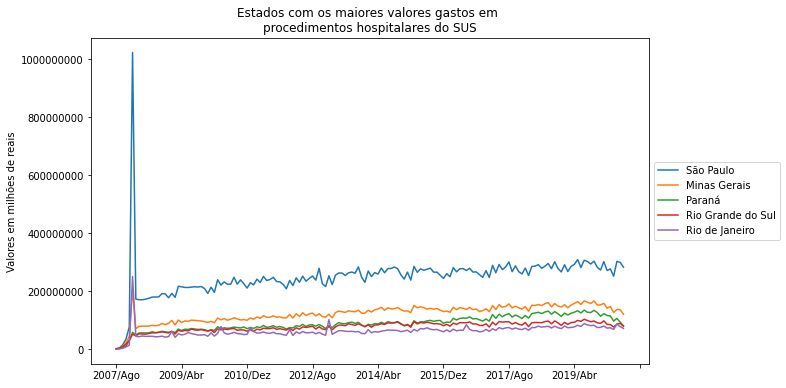

In [ ]:


ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}")) #Editando a formatação do eixo Y
ax.set_ylabel("Valores em milhões de reais")

plt.title("Estados com os maiores valores gastos em \nprocedimentos hospitalares do SUS")
plt.show()

### Adicionar o seu estado aos 5 estados existentes

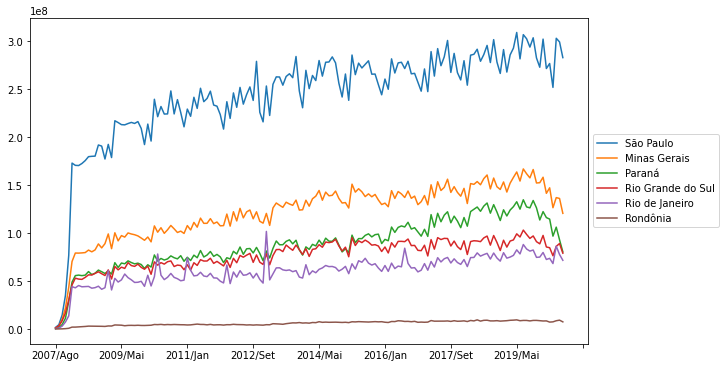

In [ ]:
# Criado um novo dataframe com os dados já transpostos
# Efetuada a transposição do dataframe ordenado_por_total e selecionada a coluna "11 Rondônia"
# Criada a coluna no no dataframe e populada com a seleção anterior
os6 = ordenado_por_total.head(5).T 
os6["Rondônia"] = ordenado_por_total.T["Rondônia"]

# Removendo apenas o mês de 2008/Jan que possui uma variação muito alta
os6 = os6.drop("2008/Jan")

os6.plot(figsize=(10,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

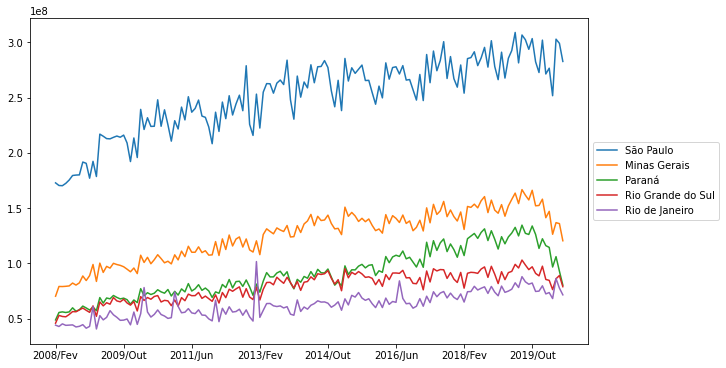

In [ ]:
# Descartando todos os meses anteriores a 2008/Fev

# selecionando as colunas de interesse e salvando em uma variável
colunas_interesse = ordenado_por_total.columns[6:]
# atualizando o dataset somente com as colunas de interesse
ordenado_por_total = ordenado_por_total[colunas_interesse]
# Plot
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
ordenado_por_total.columns[6:]

Index(['2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan',
       '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=144)

### Plotar o gráfico da região sudeste e verificar picos similares em 2012/2013, junto com o gráfico do seu estado

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


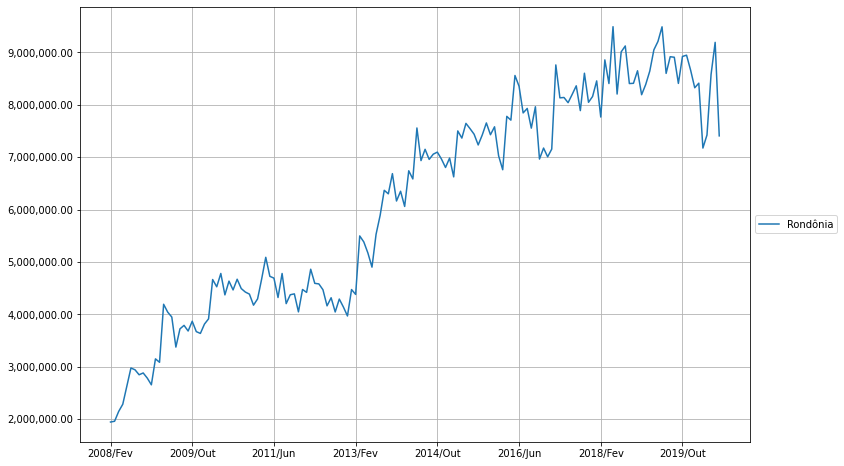

In [ ]:
colunas_sudeste = ordenado_por_total.index.str.startswith("3")
#colunas_sudeste
ordenado_sudeste = ordenado_por_total[colunas_sudeste]


ordenado_sudeste.loc["Rondônia"] = ordenado_por_total.loc["Rondônia"]
ax = ordenado_sudeste.T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid();

In [ ]:
ordenado_sudeste = (ordenado_sudeste/1000000)

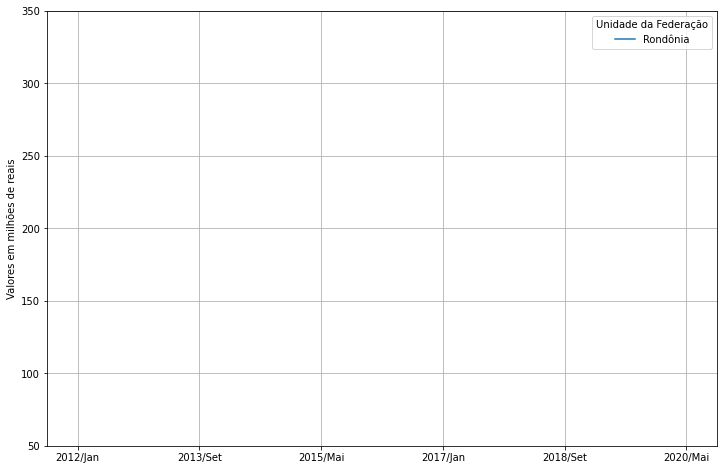

In [ ]:
meses_filtrados = ordenado_sudeste.columns[47:148] 
ax = ordenado_sudeste[meses_filtrados].head(3).T.plot(figsize=(12,8))
ax.set_ylabel("Valores em milhões de reais")
plt.ylim(50,350)
plt.grid()

## 1.5

In [ ]:
mes_mais_recente = ordenado_sudeste.columns[-1]
mes_mais_recente

'2020/Jul'

In [ ]:
gastos_mes_mais_recente_sudeste = ordenado_sudeste[mes_mais_recente]
gastos_mes_mais_recente_sudeste

Unidade da Federação
Rondônia   7.41
Name: 2020/Jul, dtype: float64

In [ ]:
gastos_mes_mais_recente_sudeste/gastos_mes_mais_recente_sudeste.loc["Rondônia"]
# Estados com maiores gastos em comparação com RO

Unidade da Federação
Rondônia   1.00
Name: 2020/Jul, dtype: float64

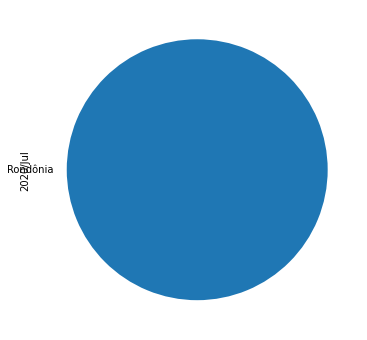

In [ ]:
gastos_mes_mais_recente_sudeste.T.plot(figsize=(10,6), kind="pie")

In [ ]:
# Problemas 
#- Legenda
#- cálculo da área 
#- ordenação ou falta dela
#- proporção
#- comparação entre valores absolutos
#- comparação entre grandezas

### Cria a tabela de comparação com o seu estado

In [ ]:
# Comparação de gastos do mês mais recente de RO com os demais estados

gastos_mes_mais_recente_all = ordenado_por_total[mes_mais_recente] 
gastos_mes_mais_recente_all = gastos_mes_mais_recente_all / 1000000
gastos_mes_mais_recente_all = gastos_mes_mais_recente_all.sort_values(ascending=False)
gastos_funcao_ro = gastos_mes_mais_recente_all/ gastos_mes_mais_recente_all.loc["Rondônia"]
gastos_funcao_ro


Unidade da Federação
São Paulo             38.17
Minas Gerais          16.26
Paraná                10.84
Rio Grande do Sul     10.66
Rio de Janeiro         9.66
Pernambuco             8.41
Bahia                  7.95
Santa Catarina         6.99
Goiás                  4.52
Ceará                  4.16
Pará                   3.73
Espírito Santo         3.71
Maranhão               3.29
Distrito Federal       3.00
Rio Grande do Norte    2.65
Piauí                  2.43
Paraíba                2.09
Amazonas               1.80
Alagoas                1.77
Mato Grosso            1.77
Mato Grosso do Sul     1.69
Rondônia               1.00
Tocantins              0.61
Sergipe                0.45
Roraima                0.37
Amapá                  0.29
Acre                   0.16
Name: 2020/Jul, dtype: float64

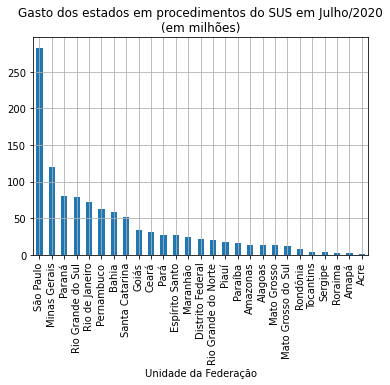

In [ ]:
gastos_mes_mais_recente_all.plot(kind='bar', title="Gasto dos estados em procedimentos do SUS em Julho/2020\n(em milhões)", grid=True)

In [ ]:
gastos_mes_mais_recente_all

Unidade da Federação
São Paulo             282.71
Minas Gerais          120.47
Paraná                 80.32
Rio Grande do Sul      78.93
Rio de Janeiro         71.54
Pernambuco             62.33
Bahia                  58.90
Santa Catarina         51.76
Goiás                  33.50
Ceará                  30.81
Pará                   27.62
Espírito Santo         27.46
Maranhão               24.37
Distrito Federal       22.23
Rio Grande do Norte    19.59
Piauí                  18.02
Paraíba                15.49
Amazonas               13.36
Alagoas                13.09
Mato Grosso            13.08
Mato Grosso do Sul     12.51
Rondônia                7.41
Tocantins               4.49
Sergipe                 3.31
Roraima                 2.74
Amapá                   2.16
Acre                    1.16
Name: 2020/Jul, dtype: float64

### Gráfico em função de RO

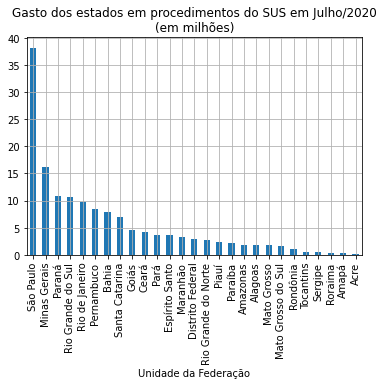

In [ ]:
gastos_funcao_ro.sort_values(ascending=False)
gastos_funcao_ro.plot(kind='bar', title="Gasto dos estados em procedimentos do SUS em Julho/2020\n(em milhões)", grid=True)

### Gasto comparativo per capita

In [ ]:
## Escolher outro valor no tabnet diferente de valor aprovado

In [ ]:
##
# print(f"{confirmados[1]}-{confirmados[0]} = {confirmados[1] - confirmados[0]}")
# dados.loc[dados["date"]=="27/09/2020"]
## 

### Desafio: gasto por população de dois estados. escolha dois estados. gráfico de barras.

In [ ]:
dict_estado_populacao = {'35 São Paulo':	46289333,	
'31 Minas Gerais':	21331292,
'33 Rio de Janeiro':	17366189,
'29 Bahia':	14930634,
'41 Paraná':	11516840,
'43 Rio Grande do Sul':	11422973,
'26 Pernambuco':	9616621,
'23 Ceará':	9187103,
'15 Pará':	8690745,
'42 Santa Catarina':	7279638,
'52 Goiás':	7142070,
'21 Maranhão':	7127460,
'13 Amazonas':	4228381,
'32 Espírito Santo':	4064052,
'25 Paraíba':	4039277,
'24 Rio Grande do Norte':	3534165,
'51 Mato Grosso':	3526220,
'27 Alagoas':	3351543,
'22 Piauí':	3281480,
'53 Distrito Federal':	3055149,
'50 Mato Grosso do Sul':	2809394,
'28 Sergipe':	2318822,
'11 Rondônia':	1796460,
'17 Tocantins':	1590248,
'12 Acre':	894470,
'16 Amapá':	861773,
'14 Roraima':	631181}

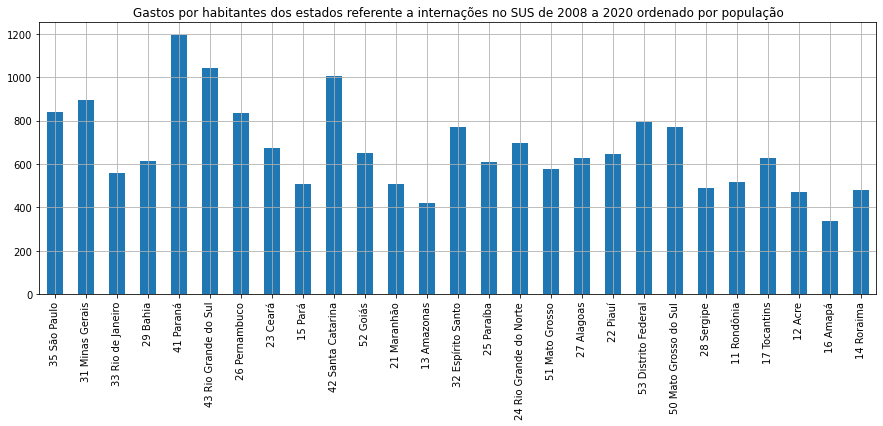

In [ ]:
gasto_por_hab_por_estado = [[usaveis["Total"].loc[estado] / dict_estado_populacao[estado], dict_estado_populacao[estado]] for estado in dict_estado_populacao.keys()]
df_gasto_por_hab = pd.DataFrame(data=gasto_por_hab_por_estado, index=dict_estado_populacao.keys(), columns=['Gasto por habitante', 'Num de Habitantes'])
df_gasto_por_hab.sort_values(by='Num de Habitantes', ascending=False)['Gasto por habitante'].plot(kind='bar', grid=True, figsize=(15,5))
plt.title("Gastos por habitantes dos estados referente a internações no SUS de 2008 a 2020 ordenado por população")
plt.show()

In [ ]:
def custo_hab(populacao_A, estado_A, populacao_B, estado_B): # Função para fazer cálculo por habitante comparando entre dois estados.
  gasto_A = usaveis["Total"].loc[estado_A] / populacao_A
  gasto_B = usaveis["Total"].loc[estado_B] / populacao_B
  df_gasto_por_hab = pd.DataFrame(data=[gasto_A, gasto_B], index=[estado_A, estado_B], columns=['Gasto por habitante'])
  df_gasto_por_hab.plot(kind='bar', grid=True, figsize=(15,5))

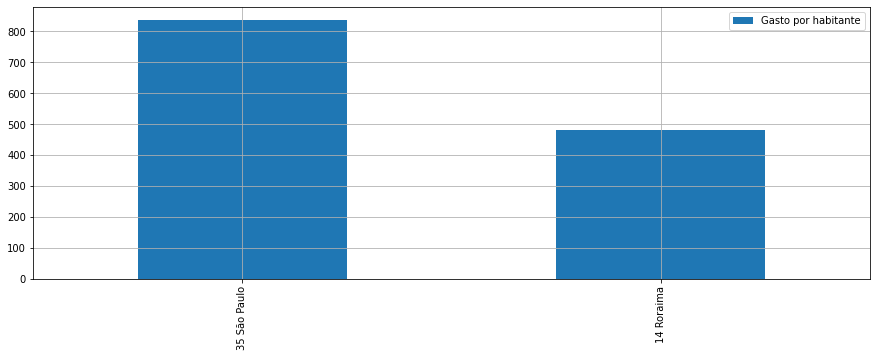

In [ ]:
custo_hab(46289333, '35 São Paulo', 631181, '14 Roraima')

# Módulo 2

## 2.1

In [ ]:
import pandas as pd
# ctulio/agendamento-hospitalar/dados/A160324189_28_143_208.csv
dados = pd.read_csv("https://github.com/ctulio/agendamento-hospitalar/raw/main/dados/A160324189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";",
                    thousands=".", decimal="," )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


Tudo que é absoluto desconsidera a relatividade do mundo.

In [ ]:
t = dados[["Unidade da Federação", "2020/Ago"]]
pd.options.display.float_format="{:.2f}".format
t["2020/Ago"] = t["2020/Ago"].replace("-",0)
t["2020/Ago"] = t["2020/Ago"].astype(float)
t["2020/Ago"] = t["2020/Ago"] 
t.set_index("Unidade da Federação")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,2020/Ago
Unidade da Federação,
11 Rondônia,3556381.57
12 Acre,0.00
13 Amazonas,4726485.73
14 Roraima,1524478.04
15 Pará,11559714.54
16 Amapá,834187.31
17 Tocantins,2453362.74
21 Maranhão,10916718.78
22 Piauí,7926321.69


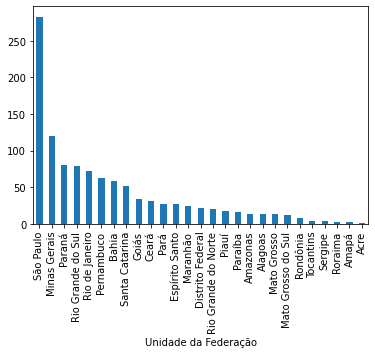

In [ ]:
gastos_mes_mais_recente_all = gastos_mes_mais_recente_all.sort_values(ascending=False)
gastos_mes_mais_recente_all.plot(kind='bar')

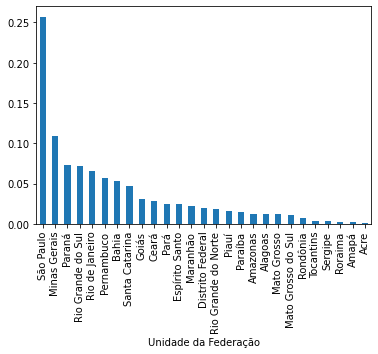

In [ ]:
gastos_proporcionais = gastos_mes_mais_recente_all / gastos_mes_mais_recente_all.sum()
gastos_proporcionais.plot(kind='bar')

In [ ]:
# Lendo arquivo xls
dados_ibge_estimativa = pd.read_excel('https://github.com/ctulio/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls')#, skiprows=2)
dados_ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [ ]:
# Lendo dados a partir de uma string

# https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

dados_populacao_wiki = """ Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

from io import  StringIO
dados_populacao_wiki_io = StringIO(dados_populacao_wiki)
pd.read_csv(dados_populacao_wiki_io,sep="\t")

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


### Desafio

In [ ]:
# Unidade federativa = uf
# População = populacao
# remover a linha 0
# uf = index
# drop other columns

In [ ]:
import pandas as pd

table_1 = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="Unidade federativa")
table_2 = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
print(len(table_1), len(table_2))

1 5


In [ ]:
table_1 = table_1[0]

In [ ]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
dado_html = table_1.drop(columns=["Posição", "% da pop. total", "País comparável (habitantes)"])
dado_html.columns = ["uf", "populacao"]
dado_html = dado_html.set_index("uf")


In [ ]:

dado_html["populacao"] = dado_html["populacao"].str.replace(" ","").astype(int)
dado_html.head(3)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189


In [ ]:
gastos_mes_mais_recente_all.head(2)
#display(dado_html.columns)

Unidade da Federação
São Paulo      282.71
Minas Gerais   120.47
Name: 2020/Jul, dtype: float64

In [ ]:
dado_html.join(gastos_mes_mais_recente_all)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


In [ ]:
# *for* para substituição de nomes repetidos
"""
for estado in tabela:
  tabela.index = tabela.index.str.replace(f"{estado} {estado}", estado)
tabela.index
"""

'\nfor estado in tabela:\n  tabela.index = tabela.index.str.replace(f"{estado} {estado}", estado)\ntabela.index\n'

In [ ]:
tst = dados["Unidade da Federação"]
tst = tst.str[2:] 
tst[0]

' Rondônia'

In [ ]:
def replace_name(indice):
  for item in indice:
    indice = indice.str.strip()
    indice = indice.str.replace(" ","_")
    return indice[23]

replace_name(tst)

     

'Mato_Grosso_do_Sul'

### Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [ ]:
# Uso do match torna mais específico
table_1 = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="Unidade federativa")
table_1 = table_1[0]

### Desafio 02 - Neste desafio temos uma série de passos:

*    Padronizar os nomes das colunas
*    Transformar os dados nos tipos corretos
*    Transformar a UF em index

In [ ]:
##  Deixando as colunas "Unidade federativa" e "Posição"
#dado_html = table_1.drop(columns=["Posição", "% da pop. total", "País comparável (habitantes)"])
##  Renomenado as colunas para o padrão
#dado_html.columns = ["uf", "populacao"]
##  setando como índice
#dado_html = dado_html.set_index("uf")

### Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

### Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [ ]:
teste = table_1.copy()


In [ ]:
def limpa_dataset(raw_df, colunas, parc_df):
  """
  Recebe um dataframe cru, um conjunto de colunas separadas por vírgula e uma série para o append

  """
  colunas = colunas.replace(", ",",")
  colunas = colunas.split(",")
    
  tam = len(colunas)
  for i in range(tam):
    raw_df = raw_df.drop(columns=[colunas[i]])
  n_index = raw_df.columns[0] # recebe o nome da coluna que será o novo índice
  raw_df = raw_df.set_index(n_index)
  new_df = raw_df.join(parc_df)
  
  return new_df

unida = limpa_dataset(teste, "% da pop. total, País comparável (habitantes),Posição", gastos_mes_mais_recente_all)


In [ ]:
unida.index.names =["uf"]
unida = unida.rename(columns = {"População":"populacao"})
unida["populacao"] = unida["populacao"].str.replace(" ","").astype(int)

unida["gastos"] = unida["2020/Jul"] * 1000000


In [ ]:
unida.columns

Index(['populacao', '2020/Jul', 'gastos'], dtype='object')

## 2.2

In [ ]:
unida["gasto por hab"] = unida["gastos"] / unida["populacao"]

In [ ]:
unida["gasto por hab"].head(2)

uf
São Paulo      6.11
Minas Gerais   5.66
Name: gasto por hab, dtype: float64

In [ ]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos, dados: pd.DataFrame, mes: str): # Type hints.
  gastos_do_mes = todos_os_gastos[mes] 

  dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados[f"gasto por hab_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]


In [ ]:
  
  insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, unida, "2020/Jul")

In [ ]:
unida.columns

Index(['populacao', '2020/Jul', 'gastos', 'gasto por hab', 'gastos_2020/Jul',
       'gasto por hab_2020/Jul'],
      dtype='object')

In [ ]:
ordenado_por_total["2020/Jul"]#.index.str[3:]

Unidade da Federação
São Paulo             282709570.31
Minas Gerais          120467187.34
Paraná                 80320852.69
Rio Grande do Sul      78929703.81
Rio de Janeiro         71540227.33
Bahia                  58898100.40
Pernambuco             62325444.34
Santa Catarina         51764534.76
Ceará                  30809221.22
Goiás                  33499284.38
Pará                   27618727.51
Maranhão               24374205.15
Espírito Santo         27460475.47
Rio Grande do Norte    19593057.45
Paraíba                15491469.06
Distrito Federal       22233542.26
Mato Grosso do Sul     12508717.35
Piauí                  18019214.49
Alagoas                13087850.40
Mato Grosso            13083151.70
Amazonas               13358514.02
Sergipe                 3312766.32
Tocantins               4489665.87
Rondônia                7407388.24
Acre                    1163813.08
Roraima                 2739498.41
Amapá                   2155083.37
Name: 2020/Jul, dtype: float64

In [ ]:
unida.head(3)

,populacao,2020/Jul,gastos,gasto por hab,gastos_2020/Jul,gasto por hab_2020/Jul
uf,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,282709570310000.00,6107445.32
Minas Gerais,21292666,120.47,120467187.34,5.66,120467187340000.00,5657684.54
Rio de Janeiro,17366189,71.54,71540227.33,4.12,71540227330000.00,4119512.19


In [ ]:
unida[["gastos_2020/Jul", "populacao"]].head()

,gastos_2020/Jul,populacao
uf,,
São Paulo,282709570310000.00,46289333
Minas Gerais,120467187340000.00,21292666
Rio de Janeiro,71540227330000.00,17366189
Bahia,58898100400000.00,14930634
Paraná,80320852690000.00,11516840


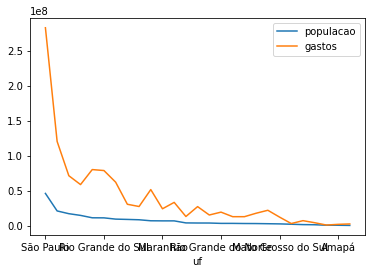

In [ ]:
# primeira plotagem
unida[["populacao","gastos"]].plot()

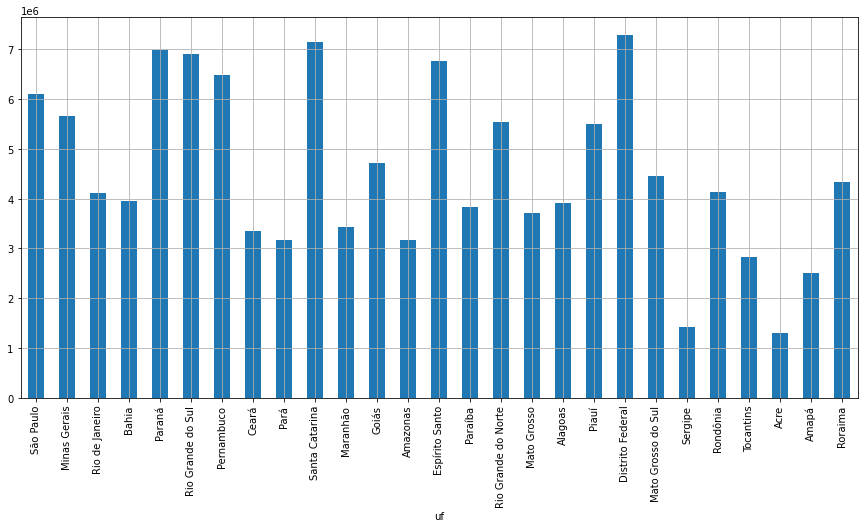

In [ ]:
unida["gasto por hab_2020/Jul"].plot(kind="bar", figsize=(15,7), grid=True)

# está ordenado pelo maior gasto absoluto
# SP o estado que mais gasta em valor absoluto gasta R$6/hab, Roraima tem o menor valor absoluto gasta R$4,40/hab

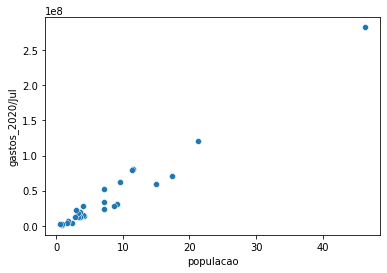

In [ ]:
import seaborn as sns
sns.scatterplot(data=unida /1000000,  x="populacao", y="gastos_2020/Jul")

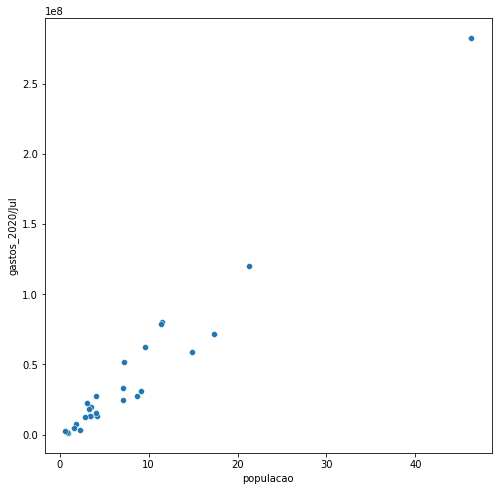

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=unida /1000000,  x="populacao", y="gastos_2020/Jul")

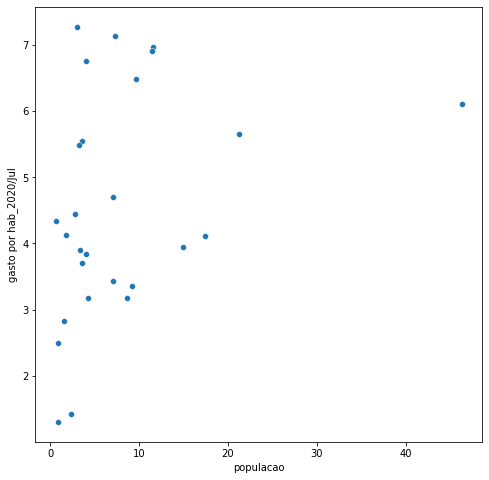

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=unida /1000000 ,  x="populacao", y="gasto por hab_2020/Jul")

### Desafio: Ordenar por "gasto por hab" e por "habitantes"

In [ ]:
unida["gasto por hab"].sort_values(ascending=False)

uf
Distrito Federal      7.28
Santa Catarina        7.14
Paraná                6.97
Rio Grande do Sul     6.91
Espírito Santo        6.76
Pernambuco            6.48
São Paulo             6.11
Minas Gerais          5.66
Rio Grande do Norte   5.54
Piauí                 5.49
Goiás                 4.71
Mato Grosso do Sul    4.45
Roraima               4.34
Rondônia              4.12
Rio de Janeiro        4.12
Bahia                 3.94
Alagoas               3.91
Paraíba               3.84
Mato Grosso           3.71
Maranhão              3.43
Ceará                 3.35
Pará                  3.18
Amazonas              3.17
Tocantins             2.82
Amapá                 2.50
Sergipe               1.43
Acre                  1.30
Name: gasto por hab, dtype: float64

In [ ]:
unida["2020/Jul"].sort_values(ascending=False)

uf
São Paulo             282.71
Minas Gerais          120.47
Paraná                 80.32
Rio Grande do Sul      78.93
Rio de Janeiro         71.54
Pernambuco             62.33
Bahia                  58.90
Santa Catarina         51.76
Goiás                  33.50
Ceará                  30.81
Pará                   27.62
Espírito Santo         27.46
Maranhão               24.37
Distrito Federal       22.23
Rio Grande do Norte    19.59
Piauí                  18.02
Paraíba                15.49
Amazonas               13.36
Alagoas                13.09
Mato Grosso            13.08
Mato Grosso do Sul     12.51
Rondônia                7.41
Tocantins               4.49
Sergipe                 3.31
Roraima                 2.74
Amapá                   2.16
Acre                    1.16
Name: 2020/Jul, dtype: float64

### Desafio: fazer os últimos gráficos para o mês anterior a este

In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, unida, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, unida, "2020/Mai")

unida.head(3)

,populacao,2020/Jul,gastos,gasto por hab,gastos_2020/Jul,gasto por hab_2020/Jul,gastos_2020/Jun,gasto por hab_2020/Jun,gastos_2020/Mai,gasto por hab_2020/Mai
uf,,,,,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,282709570310000.00,6107445.32,299060851620000.00,6460686.13,302857660980000.00,6542709.55
Minas Gerais,21292666,120.47,120467187.34,5.66,120467187340000.00,5657684.54,135977571870000.00,6386122.43,136867275750000.00,6427906.95
Rio de Janeiro,17366189,71.54,71540227.33,4.12,71540227330000.00,4119512.19,77604925210000.00,4468736.65,86281033160000.00,4968334.34


### Desafio: fazer os últimos gráficos com os dois no mesmo gráfico
Plotar no mesmo gráfico diferenciando por cor o mês anterior e o mês atual

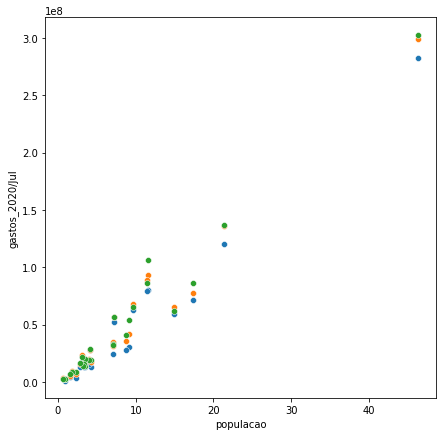

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=unida /1000000,  x="populacao", y="gastos_2020/Jul")
sns.scatterplot(data=unida /1000000,  x="populacao", y="gastos_2020/Jun")
sns.scatterplot(data=unida /1000000,  x="populacao", y="gastos_2020/Mai")

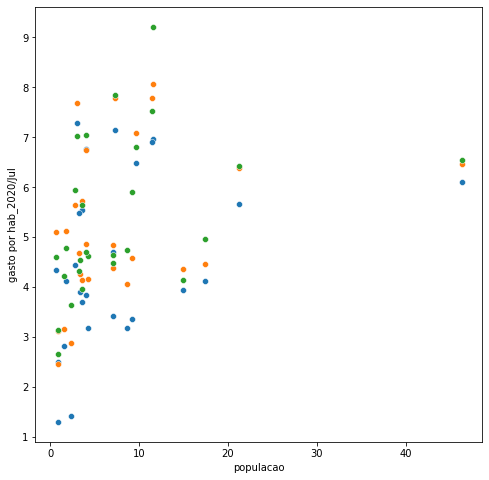

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=unida/1000000,  x="populacao", y="gasto por hab_2020/Jul")
sns.scatterplot(data=unida/1000000,  x="populacao", y="gasto por hab_2020/Jun")
sns.scatterplot(data=unida/1000000,  x="populacao", y="gasto por hab_2020/Mai")

### Desafio: Analisar os gráficos e levantar hipotéses. A conclusão é uma hipotése

## 2.3

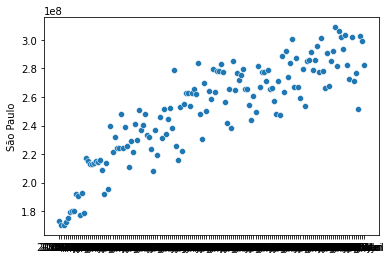

In [ ]:
# Usar o scatterplot com listas, sem dataframe
# Não está passando 'data='

# O uso tradicional do scatterplot é a plotagem de uma coluna

sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

In [ ]:
mensal = ordenado_por_total.T
mensal.head(2)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93


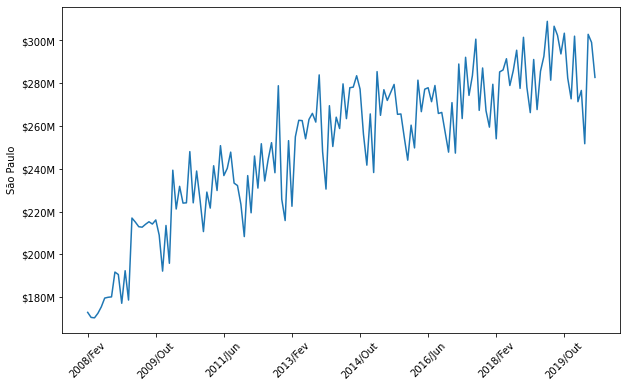

In [ ]:
# O ticker autoLocator não fornece um padrão que facilita a visualização
plt.figure(figsize=(10,6))

## lineplot ou scatterplot
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=45)
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

def millions(x, pos):
    return '${:,.0f}M'.format(x*1e-6)

fmtr = ticker.FuncFormatter(millions)
_ = ax.yaxis.set_major_formatter(fmtr)

ax.xaxis.set_major_locator(ticker.AutoLocator());

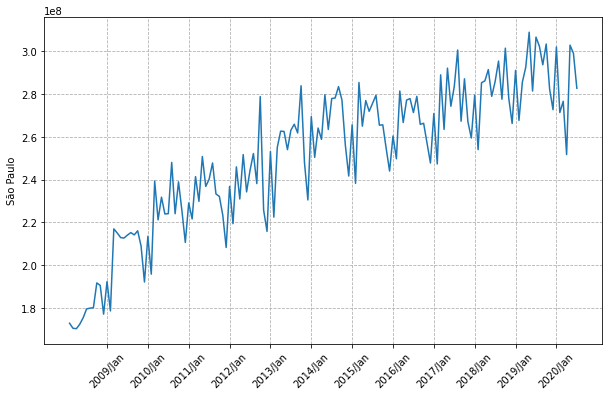

In [ ]:
## IndexLocator
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=45)
#plt.ylim(0, 350000)
# indexLocator
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
# Utilizar o parâmetro offset ajusta o ponto de visualização
# offset=11 marca os meses de janeiro

plt.grid(True, linestyle="--");


### Desafio: configurar o eixo x em milhões (formatar com StrMthodFormatter.
# Colocar um título e os 2 titulos nos 2 eixos
# Alterar tamanho e fonte padrão

### Desafio: 

## 2.4

In [ ]:
from datetime import date

date.today()

datetime.date(2021, 2, 2)


A função recebe ano_mes, a string concatenada '2008/Fev'
Inicialmente é testado somente o valor 'ano_mes' = '2008/Fev'
```
def para_dia(ano_mes):
  if mes == '2008/Fev':
    return date(2008,2,1)
  return None
```

É definida a variável 'ano' e feito um *casting* para tipo int.
O *return* é alterado para retornar o date(ano,1,1)
```
def para_dia(ano_mes):
  ano = int(mes[:4])  
  if mes == '2008/Fev':
    return date(ano,2,1)
  return date(ano,1,1)
  ```


Para retornar o mês correspondente ao numeral (1=jan, 2=fev...) é feito um mapeamento map() em vez de um *if* encadeado dentro da função
A variável 'mes' é uma string a partir da 6a posição [5:] do ano_mes. E ela é usava como chave do dicionário meses{} para recuperar o valor, que é um número ('Jan':1).
mes_num = meses['mes']
      _ = *'Jan':1
O _return_ passa retornar tbm o mês (mes_num) e o dia padrão '1'
```
meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_num: int = meses[mes]
  return date(ano,mes_num,1)
  ```





In [ ]:
meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_num: int = meses[mes]
  return date(ano,mes_num,1)



In [ ]:
mensal.index = mensal.index.map(para_dia)

In [ ]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


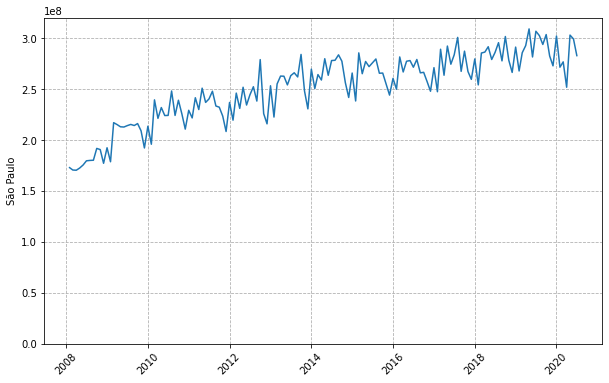

In [ ]:
## IndexLocator
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=45)
plt.ylim(0, 320000000)
# indexLocator
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
# Utilizar o parâmetro offset ajusta o ponto de visualização
# offset=11 marca os meses de janeiro

plt.grid(True, linestyle="--");


In [ ]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

O problema e fazer duas chamadas de plotagem é que não existe legenda de cores, identificação de eixos e as legendas.
O seaborn recebe x e y, e ele recebe uma única coluna(y) 

---
Utilizando o melt() determinado período para cada estado
```
mes   | valor | estado
março | 123   | SP
março | 654   | MG

```

In [ ]:
# O ano/mês é o índice, por isso é necessário reseta-lo
mensal.reset_index() 

# Gerar uma linha para cada estado e para cada período
# id_vars indica a coluna a não derreter
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)


In [ ]:
# renomeando as colunas
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]

#alterando o tipo da coluna de object para datetime
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')

In [ ]:
mensal_aberto.head(2)

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56


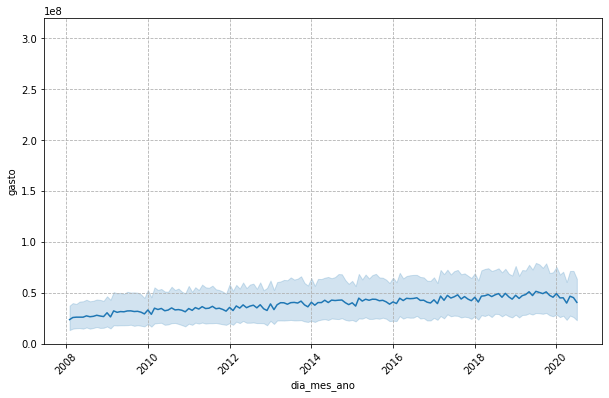

In [ ]:
## Plotagem padrão com valor médio e agregamento
## IndexLocator
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="dia_mes_ano", y="gasto")
plt.xticks(rotation=45)
plt.ylim(0, 320000000)


plt.grid(True, linestyle="--");

In [ ]:
mensal.head(2)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93


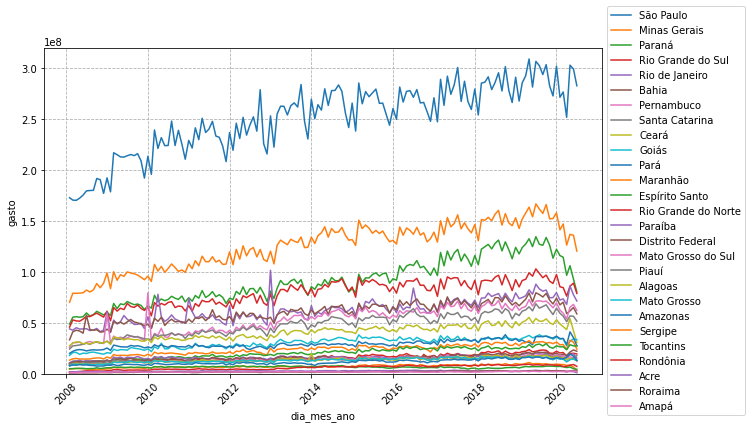

In [ ]:
## Plotagem sem agregamento
## Plotando 
## IndexLocator
plt.figure(figsize=(10,6))
cmap = sns.color_palette(n_colors=27)

ax = sns.lineplot(data=mensal_aberto, x="dia_mes_ano", y="gasto", hue="uf", palette=cmap)
plt.xticks(rotation=45)
plt.ylim(0, 320000000)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.grid(True, linestyle="--");

### Desafio
 A partir do melt, chegar à coluna original

In [ ]:
mensal_aberto.pivot(index="dia_mes_ano", columns="uf").head(2)

gasto                        ...                                   
uf                Acre    Alagoas      Amapá  ...    Sergipe    São Paulo  Tocantins
dia_mes_ano                                   ...                                   
2008-02-01  1743978.66 8112220.30 1275063.72  ... 4636850.76 172834914.73 5051932.07
2008-03-01  2057439.02 9210505.56 1177745.93  ... 5017838.07 170481849.56 5200151.87

[2 rows x 27 columns]

Desafio: melhorar o gráfico
* Escolher estados evitando distorções relativas e absolutas
* Palete de cores [seaborn.pydata.org/tutorial/color_palettes.html](https://)
* posição da legenda
* título e título  dos eixos.

In [ ]:
mensal_4_estado = mensal[["Minas Gerais", "Paraná", "Rio Grande do Sul", "Rondônia"]]

In [ ]:
 mensal_melted_4_estados = mensal_4_estado.reset_index().melt(id_vars=["index"], value_vars=mensal_4_estado.columns)

In [ ]:
mensal_melted_4_estados.columns = ["dia_mes_ano", "uf", "gasto"]

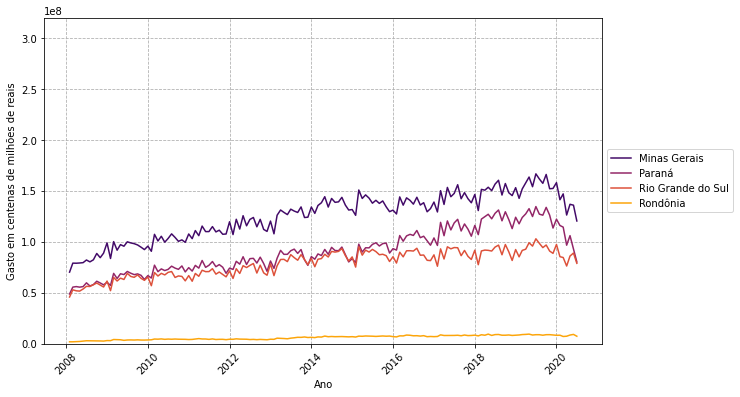

In [ ]:
## Plotagem sem agregamento
## Plotando 
## IndexLocator

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_melted_4_estados, x="dia_mes_ano", y="gasto", hue="uf",palette="inferno")


plt.xticks(rotation=45)
plt.ylim(0, 320000000)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Gasto em centenas de milhões de reais")
ax.set_xlabel("Ano")

plt.grid(True, linestyle="--");

## 2.5

In [ ]:
mensal_aberto["dia_mes_ano"].head()


0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [ ]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year

In [ ]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172834914.73,2,2008
1,2008-03-01,São Paulo,170481849.56,3,2008
2,2008-04-01,São Paulo,170278285.95,4,2008
3,2008-05-01,São Paulo,172402180.59,5,2008
4,2008-06-01,São Paulo,175416595.83,6,2008


In [ ]:
qry = mensal_aberto.query("uf == 'São Paulo'")

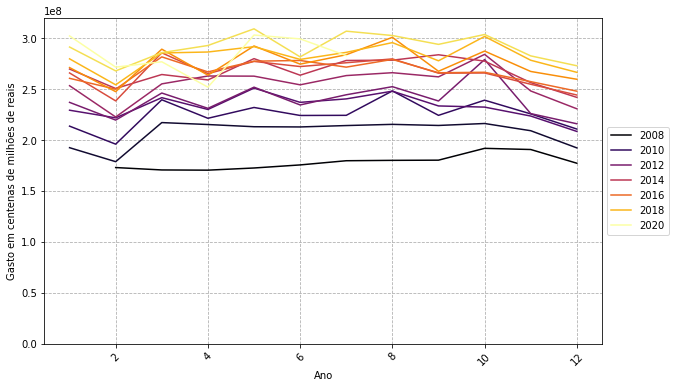

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=qry, x="mes", y="gasto", hue="ano",palette="inferno")


plt.xticks(rotation=45)
plt.ylim(0, 320000000)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Gasto em centenas de milhões de reais")
ax.set_xlabel("Ano")

plt.grid(True, linestyle="--");

In [ ]:
dias_mes={
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
    
}

In [ ]:
mensal_aberto["gasto_diario"] = mensal_aberto['gasto']/mensal_aberto['mes'].map(dias_mes)

In [ ]:
mensal_aberto.head(3)

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172834914.73,2,2008,6172675.53
1,2008-03-01,São Paulo,170481849.56,3,2008,5499414.50
2,2008-04-01,São Paulo,170278285.95,4,2008,5675942.86


In [ ]:
mensal_aberto.columns

Index(['dia_mes_ano', 'uf', 'gasto', 'mes', 'ano', 'gasto_diario'], dtype='object')

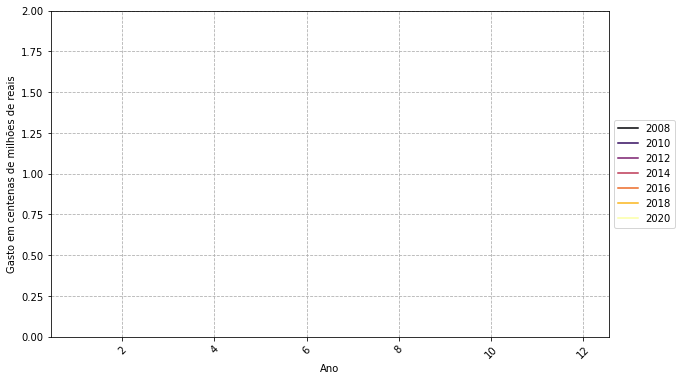

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto_diario", hue="ano", palette="inferno",ci=None)


plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Gasto em centenas de milhões de reais")
ax.set_xlabel("Ano")

plt.grid(True, linestyle="--");

### Desafio: palete, ticks de mês

### Desafio: verificar o gráfico com estados de climas diferentes diferentes. 
Gerar gráficos individuais e conjuntos



In [ ]:
meses #dict

mensal_aberto["mes"].dtype

meses_rev = {v:k for k, v in meses.items()}


In [ ]:
#list comprehensions
meses_rev2 = {meses[k]: k for k in meses}


In [ ]:
plot_mensal_aberto = mensal_aberto
plot_mensal_aberto['mes'] = plot_mensal_aberto["mes"].map(meses_rev)

In [ ]:
plot_mensal_aberto["gasto_diario"] = plot_mensal_aberto["gasto_diario"] / 1000000

In [ ]:
plot_mensal_aberto.dtypes

dia_mes_ano     datetime64[ns]
uf                      object
gasto                  float64
mes                     object
ano                      int64
gasto_diario           float64
dtype: object

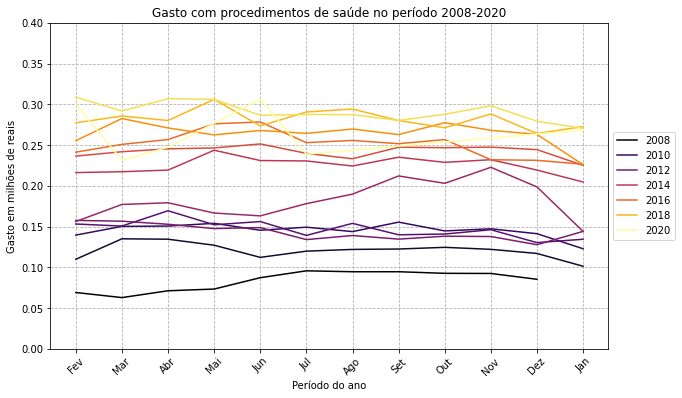

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=plot_mensal_aberto.query("uf=='Rondônia'"), x="mes", y="gasto_diario", hue="ano", palette="inferno",style=None)


plt.xticks(rotation=45)
plt.ylim(0, 0.4)
plt.title("Gasto com procedimentos de saúde no período 2008-2020")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Gasto em milhões de reais")
ax.set_xlabel("Período do ano")

plt.grid(True, linestyle="--");

## 2.6

In [ ]:
# dados.describe(include=['category'])

In [ ]:
estado_analisado = plot_mensal_aberto.query("uf=='Rondônia'")
estado_analisado.head(5)

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
3450,2008-02-01,Rondônia,1940792.63,Fev,2008,0.07
3451,2008-03-01,Rondônia,1955721.68,Mar,2008,0.06
3452,2008-04-01,Rondônia,2143353.81,Abr,2008,0.07
3453,2008-05-01,Rondônia,2280382.58,Mai,2008,0.07
3454,2008-06-01,Rondônia,2624542.97,Jun,2008,0.09


In [ ]:
estado_analisado.groupby("ano").sum()

,gasto,gasto_diario
ano,,
2008,28010412.60,0.92
2009,44133812.42,1.45
2010,53124212.75,1.75
2011,53750792.13,1.77
2012,52301055.10,1.72
2013,66729484.10,2.19
2014,82257890.98,2.70
2015,88428027.15,2.91
2016,91623322.06,3.01


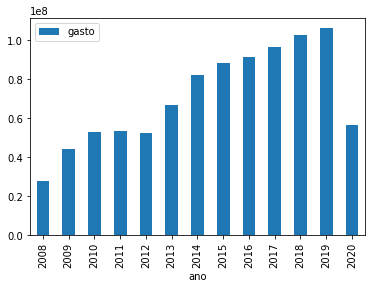

In [ ]:
gastos_por_ano = estado_analisado.groupby("ano").sum()
gastos_por_ano.plot(kind='bar', y='gasto')

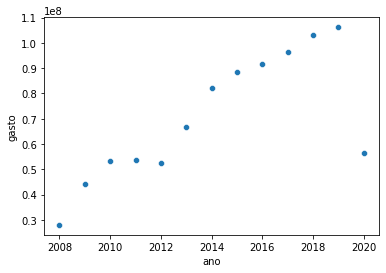

In [ ]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

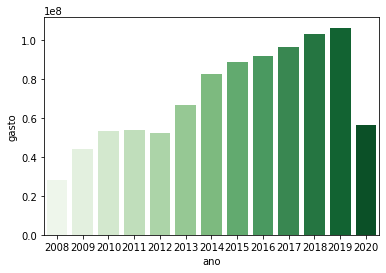

In [ ]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("Greens",13))

###Desafio: tom da barra ordenado pelo valor

In [ ]:

paleta_cores = sns.color_palette('Greens_r', len(gastos_por_ano))
rank = gastos_por_ano["gasto"].argsort().argsort()

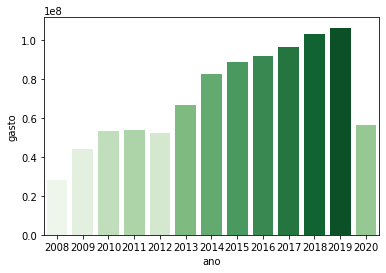

In [ ]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=np.array(paleta_cores[::-1])[rank])

In [ ]:
estados = ["São Paulo", "Minas Gerais", "Rondônia"]
por_ano_estados = mensal_aberto.query("uf in @estados").groupby(['uf', 'ano']).sum().reset_index();


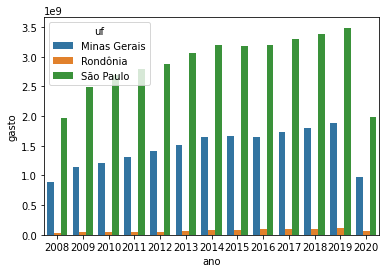

In [ ]:

paleta_cores = sns.color_palette('Greens_r', len(por_ano_estados))
rank = por_ano_estados["gasto"].argsort().argsort()
sns.barplot(data=por_ano_estados, x="ano", y="gasto",  hue="uf", )

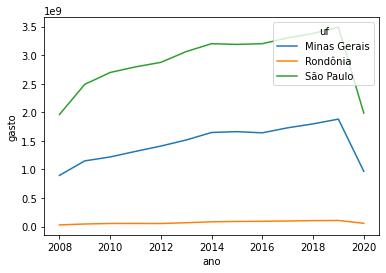

In [ ]:
sns.lineplot(data=por_ano_estados, y="gasto", x="ano", hue="uf")

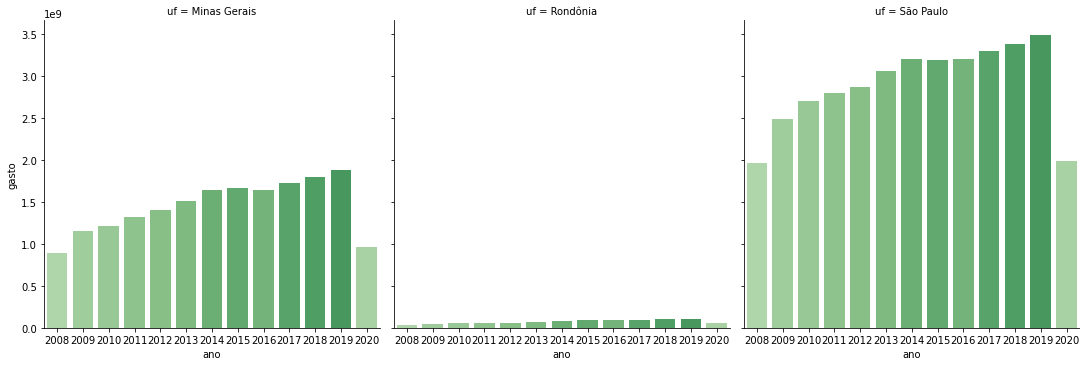

In [ ]:
sns.catplot(data=por_ano_estados, y="gasto", x="ano", kind="bar", col="uf", palette=np.array(paleta_cores[::-1])[rank])

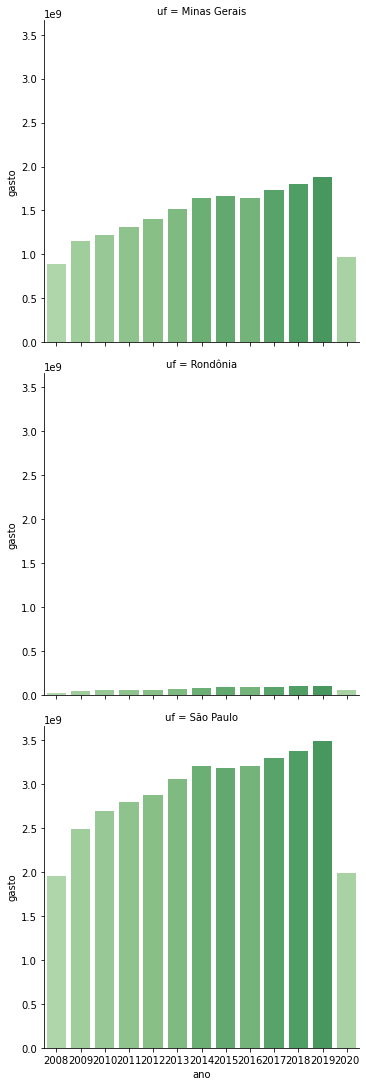

In [ ]:
sns.catplot(data=por_ano_estados, y="gasto", x="ano", kind="bar", row="uf", palette=np.array(paleta_cores[::-1])[rank])